In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("APY.csv")

# Display first 5 rows
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [4]:
# Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [5]:
# Summary statistics
df.describe()

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [6]:
# Check for missing values
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [7]:
# Drop rows with missing values (if any)
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

In [8]:
# Select only numerical columns
num_df = df.select_dtypes(include=[np.number])

num_df.head()

,Crop_Year,Area,Production,Yield
0,2007,2439.6,3415.0,1.40
1,2007,1626.4,2277.0,1.40
2,2008,4147.0,3060.0,0.74
3,2008,4147.0,2660.0,0.64
4,2009,4153.0,3120.0,0.75


In [9]:
# First four statistical moments
mean_values = num_df.mean()
variance_values = num_df.var()
skewness_values = num_df.skew()
kurtosis_values = num_df.kurtosis()

print("Mean:\n", mean_values)
print("\nVariance:\n", variance_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)

Mean:
 Crop_Year       2008.884815
Area           11826.413528
Production    958486.718555
Yield             80.578840
dtype: float64

Variance:
 Crop_Year     4.322707e+01
Area          2.127682e+09
Production    4.635768e+14
Yield         8.524336e+05
dtype: float64

Skewness:
 Crop_Year     -0.120887
Area          41.654989
Production    35.873326
Yield         14.656543
dtype: float64

Kurtosis:
 Crop_Year       -1.194588
Area          5361.878279
Production    1584.257483
Yield          256.750058
dtype: float64


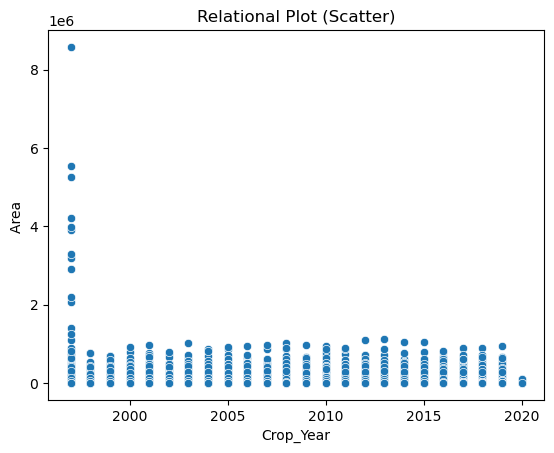

In [10]:
plt.figure()
sns.scatterplot(
    data=df,
    x=num_df.columns[0],
    y=num_df.columns[1]
)
plt.title("Relational Plot (Scatter)")
plt.xlabel(num_df.columns[0])
plt.ylabel(num_df.columns[1])
plt.show()

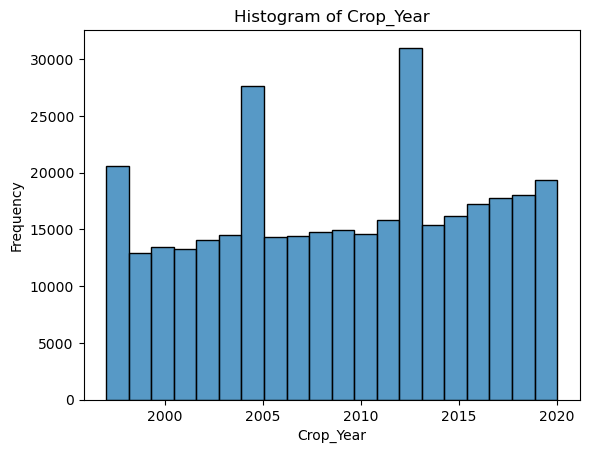

In [11]:
plt.figure()
sns.histplot(num_df[num_df.columns[0]], bins=20)
plt.title("Histogram of " + num_df.columns[0])
plt.xlabel(num_df.columns[0])
plt.ylabel("Frequency")
plt.show()

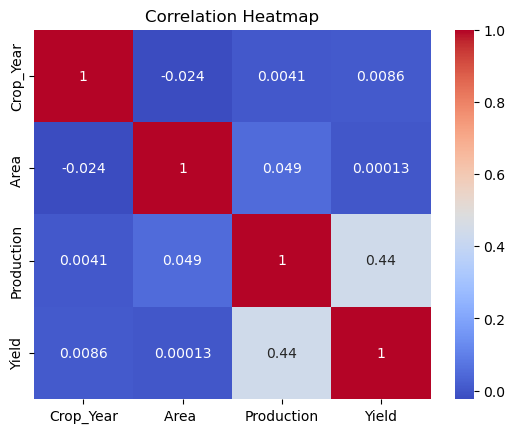

In [12]:
plt.figure()
sns.heatmap(
    num_df.corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()